<a href="https://colab.research.google.com/github/Vadiman728/FCNN-imdb/blob/main/fcnn-imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Смотрим на датасет, строим задачу

Мне не понравилось, что даже на датасет толком не глянули, чтобы понять, а какие колонки использовать и прочее прочее

In [ ]:
from keras.datasets import imdb
df = imdb.load_data()
print(df)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194,

Не совсем традиционный вид... В переменной list хранится весь отзыв, затем в виде матрицы 1 и 0 обозначено, отвечает ли слово за положительный отзыв или нет соответственно

## Загружаем датасет, делим его на выборки, подготавливаем к включению в датасет

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words= 22000)

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=22000):
    results = np.zeros((len(sequences), dimension)) # Создаем нулевой вектор с размерностью 10000!
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Записываем единицы в элемент с данным индексом
    return results

x_train = vectorize_sequences(train_data) # Векторизуем обучающие данные
x_test  = vectorize_sequences(test_data)  # Векторизуем контрольные данные

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Возводим и обучаем сеть

Epoch 1/20
625/625 [==============================] - 7s 9ms/step - loss: 0.3348 - accuracy: 0.8593 - val_loss: 0.2680 - val_accuracy: 0.8932
Epoch 2/20
625/625 [==============================] - 5s 7ms/step - loss: 0.1359 - accuracy: 0.9486 - val_loss: 0.3259 - val_accuracy: 0.8822
Epoch 3/20
625/625 [==============================] - 5s 8ms/step - loss: 0.0656 - accuracy: 0.9758 - val_loss: 0.4372 - val_accuracy: 0.8818
Epoch 4/20
625/625 [==============================] - 5s 7ms/step - loss: 0.0326 - accuracy: 0.9882 - val_loss: 0.5627 - val_accuracy: 0.8788
Epoch 5/20
625/625 [==============================] - 5s 7ms/step - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.6202 - val_accuracy: 0.8834
Epoch 6/20
625/625 [==============================] - 5s 8ms/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.8170 - val_accuracy: 0.8790
Epoch 7/20
625/625 [==============================] - 5s 8ms/step - loss: 0.0064 - accuracy: 0.9983 - val_loss: 0.9400 - val_accuracy: 0.8748
Epoch 

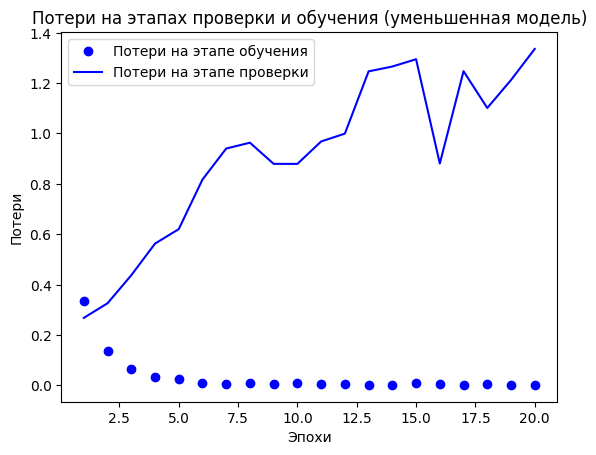

In [ ]:
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers
import keras

optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

EPOCHS = 20
BATCH_SIZE = 32

model = models.Sequential()
model.add(layers.Dense(80, activation='relu', input_shape=(22000,)))
model.add(layers.Dense(50, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

history_dict = history.history
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Потери на этапе обучения')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Потери на этапе проверки')
plt.title('Потери на этапах проверки и обучения (уменьшенная модель)')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

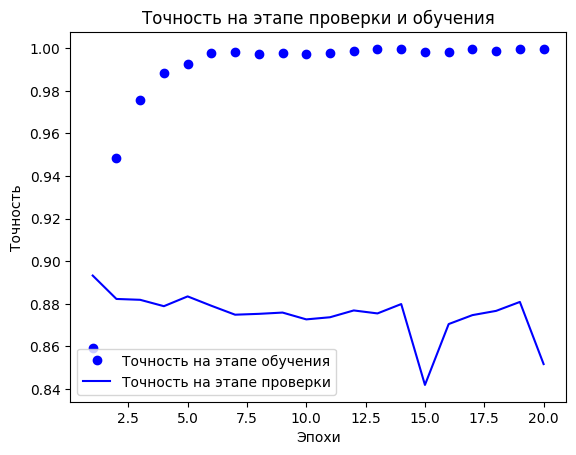

In [ ]:
plt.clf() # Очистить рисунок
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Точность на этапе обучения')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Точность на этапе проверки')
plt.title('Точность на этапе проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()